<a href="https://colab.research.google.com/github/dreas27/SDR/blob/main/SDR_Andreas_dan_Lowis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-

# **Data Loading**

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the dataset
url = '/content/drive/MyDrive/Colab Notebooks/laptop_price.csv'
laptop = pd.read_csv(url , encoding=('ISO-8859-1'), low_memory = False )
laptop

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
laptop.shape

(1303, 13)

Output kode di atas memberikan informasi sebagai berikut:

- Ada 1303 baris records dalam dataset.
- Terdapat 13 kolom yaitu: laptop_id, company, product, typename, inchies, screenresolution, cpu, ram, memory, gpu, opsys, weight, prices_euros.

# **Exploratory Data Analysis**

## Deskripsi Variabel

- laptop_id : Adalah Daftar dari Urutan Laptop
- company : adalah brand atau perusahaan pembuat laptop
- product : adalah Merk dari laptop
- typename : adalah jenis dari laptop
- inchies : adalah dimensi laptop
- screenresolution : adalah resolusi layar laptop
- cpu : adalah prosesor atau otak laptop
- ram : adalah tempat penyimpanan data sementara
- memory : adalah penyimpanan utama data laptop
- gpu : adalah perangkat untuk rendering grafis
- opsys : sistem operasi perangkat lunak
- weight : berat dari laptop
- prices_euros : adalah harga dari laptop


In [ ]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Dari output terlihat bahwa:
- Terdapat 10 kolom dengan tipe object, yaitu: company, product, typename, inchies, screenresolution, cpu, ram, memory, gpu, opsys, weight. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 2 kolom numerik dengan tipe data float64 yaitu: Inchies, dan Prices_Euros.
- Terdapat 1 kolom numerik dengan tipe data int64, yaitu: laptop_ID Kolom laptop_ID merupakan target data_base.

In [ ]:
laptop.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.


## Data Assesing

### Data Duplikat

In [ ]:
laptop.duplicated().sum()

0

### Missing Value

In [ ]:
laptop.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

## Data Cleaning

###Menangani Outliers

Beberapa pengamatan dalam satu set data kadang berada di luar lingkungan pengamatan lainnya. Pengamatan seperti itu disebut outlier.

Ada beberapa teknik untuk menangani outliers, antara lain:
- Hypothesis Testing
- Z-score method
- IQR Method

Pada kasus ini, Anda akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, Anda akan menangani outliers dengan teknik IQR method

IQR = Inter Quartile Range

IQR = Q3 - Q1.

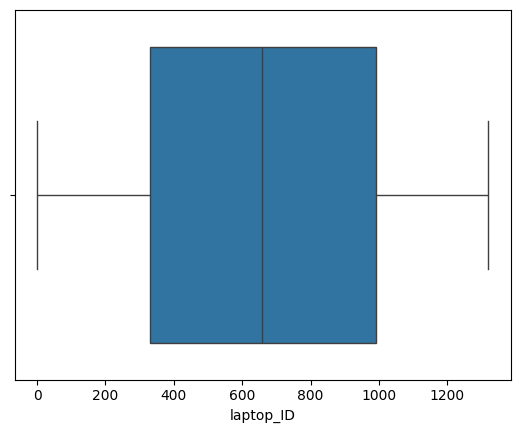

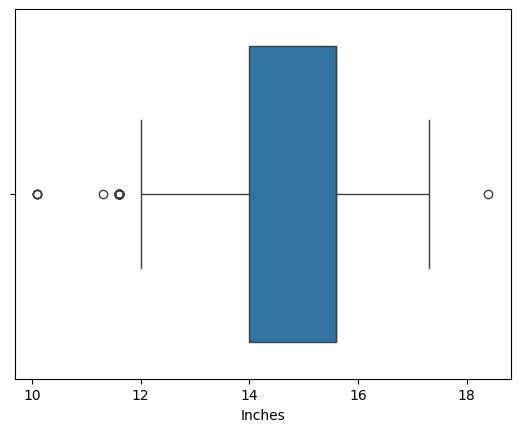

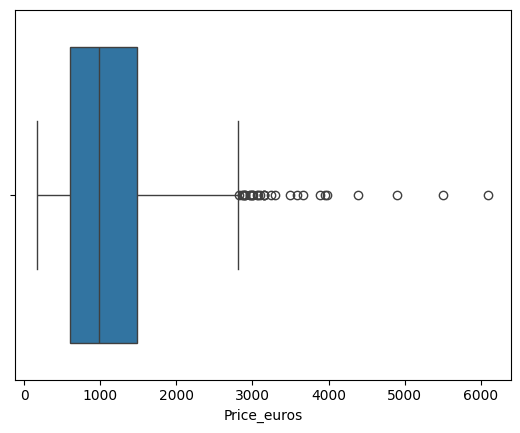

In [ ]:
laptop1 = laptop.select_dtypes(exclude=['object'])
for column in laptop1:
        plt.figure()
        sns.boxplot(data=laptop1, x=column)

In [ ]:
Q1 = laptop.quantile(0.25)
Q3 = laptop.quantile(0.75)
IQR=Q3-Q1

laptop = laptop[~((laptop<(Q1-1.5*IQR))|(laptop>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-171-1062d6574d4b>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = laptop.quantile(0.25)
<ipython-input-171-1062d6574d4b>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = laptop.quantile(0.75)
<ipython-input-171-1062d6574d4b>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  laptop = laptop[~((laptop<(Q1-1.5*IQR))|(laptop>(Q3+1.5*IQR))).any(axis=1)]


Cek ukuran dataset setelah drop outliers dengan
laptop.shape

In [ ]:
laptop.shape

(1235, 13)

## Data Analysis

Selanjutnya, lakukan proses analisis data dengan teknik Univariate EDA. Pertama, Anda bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [ ]:
categorical_features = ['Company', 'Product', 'Typename', 'Inchies', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']
numerical_features = ['Inchies', 'Prices_euros', 'laptop_ID']

### Univariate Analysis

Univariate visualization merupakan bentuk visualisasi data yang hanya merepresentasikan informasi yang terdapat pada satu variabel. Jenis visualisasi ini umumnya digunakan untuk memberikan gambaran terkait distribusi sebuah variabel dalam suatu dataset.

a. Data Kategori

           Jumlah sampel  Persentase
Dell                 283        22.9
Lenovo               282        22.8
HP                   263        21.3
Asus                 148        12.0
Acer                  94         7.6
MSI                   53         4.3
Toshiba               48         3.9
Apple                 19         1.5
Samsung                8         0.6
Microsoft              6         0.5
Mediacom               6         0.5
Xiaomi                 4         0.3
Vero                   4         0.3
Chuwi                  3         0.2
Google                 3         0.2
Fujitsu                3         0.2
Razer                  3         0.2
LG                     3         0.2
Huawei                 2         0.2


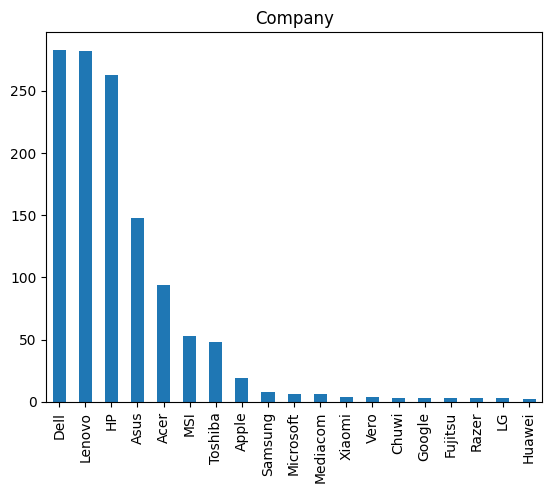

In [ ]:
feature = categorical_features[0]
count = laptop[feature].value_counts()
percent = 100*laptop[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

b. Data Numerik

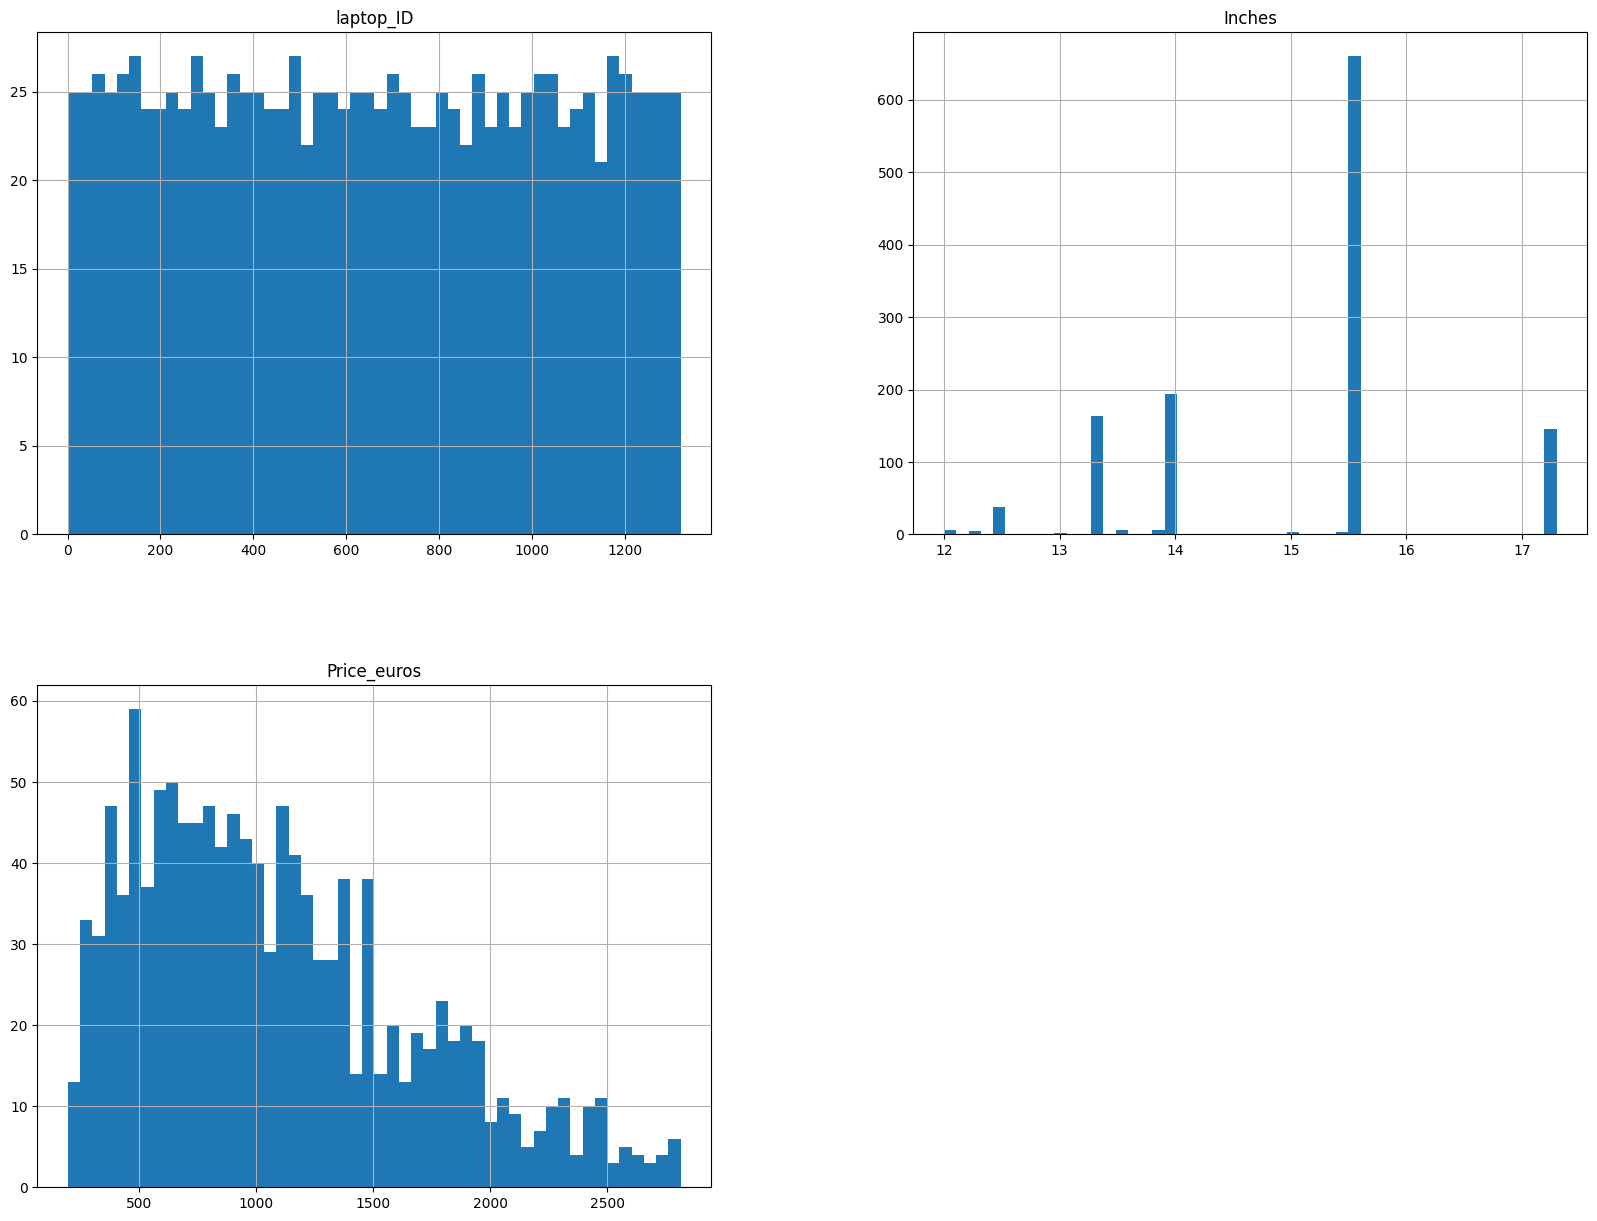

In [ ]:
laptop.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram "prices_euros", diperoleh beberapa informasi, antara lain:
- Peningkatan harga median rumah sebanding dengan penurunan jumlah sampel. Hal ini dapat terlihat jelas dari histogram "prices_euros" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

### Multivariate Analysis

Multivariate visualization merupakan jenis visualisasi data untuk menggambarkan informasi yang terdapat dalam lebih dari dua variabel. Jenis visualisasi ini digunakan untuk merepresentasikan hubungan dan pola yang terdapat dalam multidimensional data.  

Pada tahap ini,cek rata-rata "prices_euro" terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap "prices_euro".

a. Data Kategori

<ipython-input-176-567e92d0d43c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Price_euros', kind="bar", dodge=False, height = 4, aspect = 3,  data=laptop , palette="Set3")
<ipython-input-176-567e92d0d43c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Price_euros', kind="bar", dodge=False, height = 4, aspect = 3,  data=laptop , palette="Set3")
<ipython-input-176-567e92d0d43c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Price_euros', kind="bar", dodge=False, height = 4, aspect = 3,  data=laptop , palet

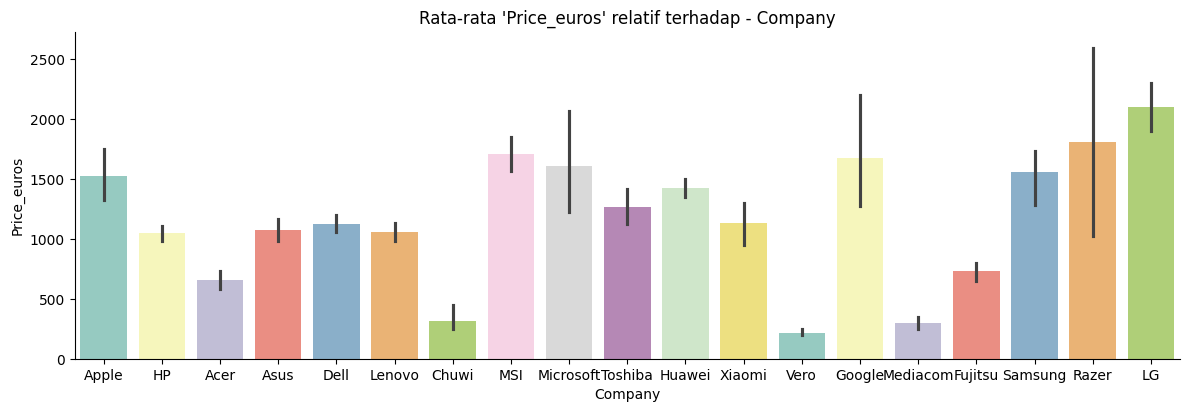

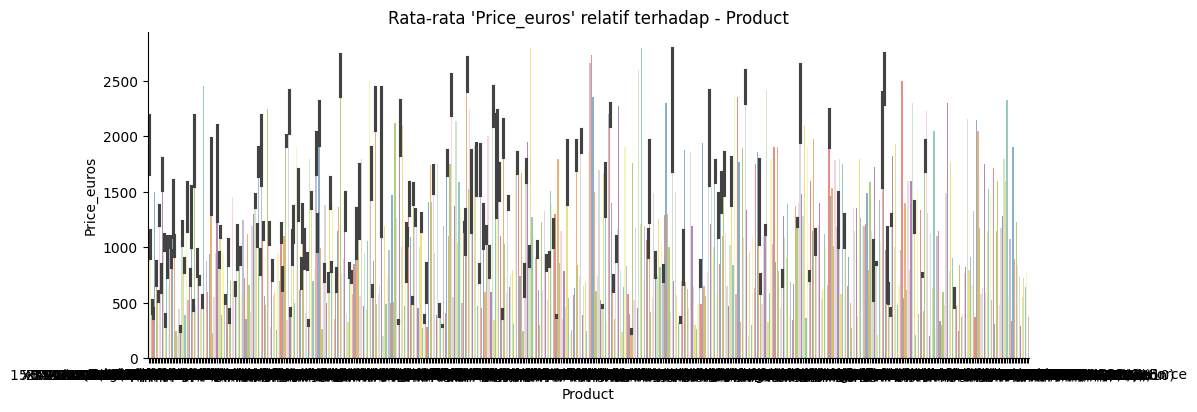

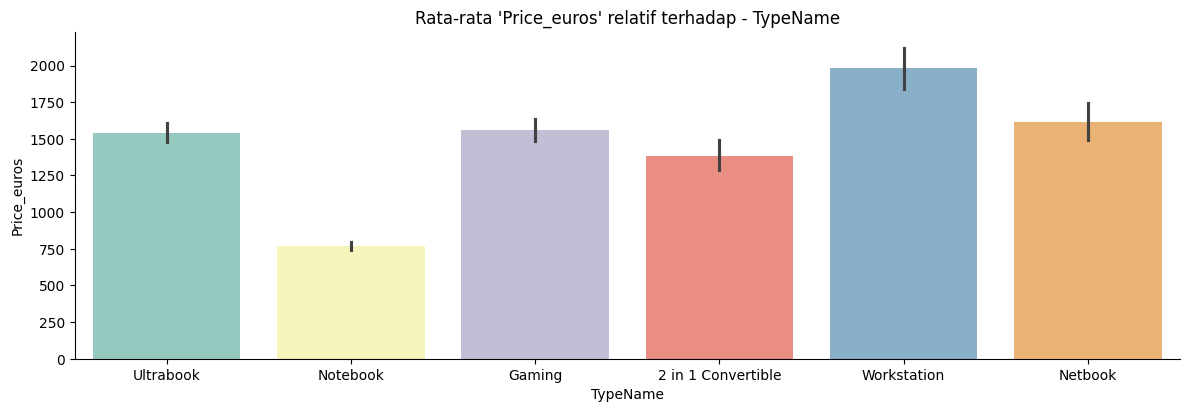

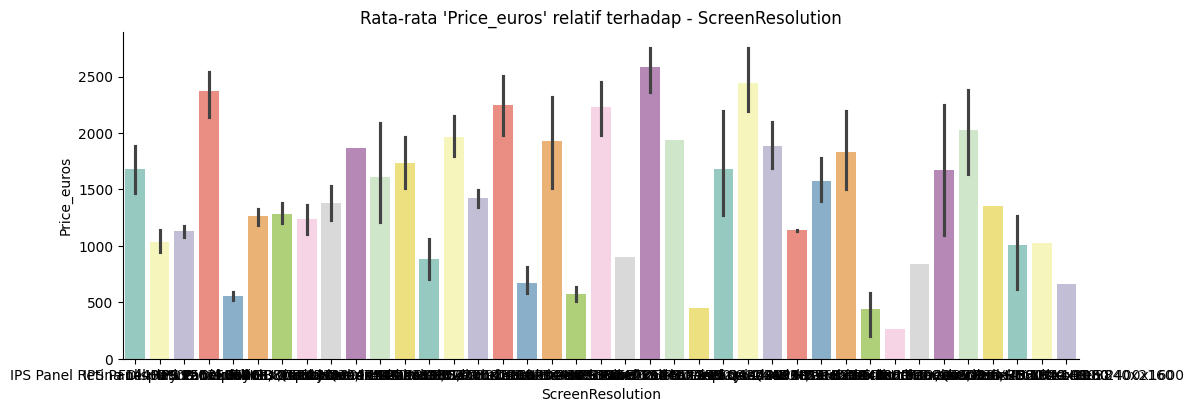

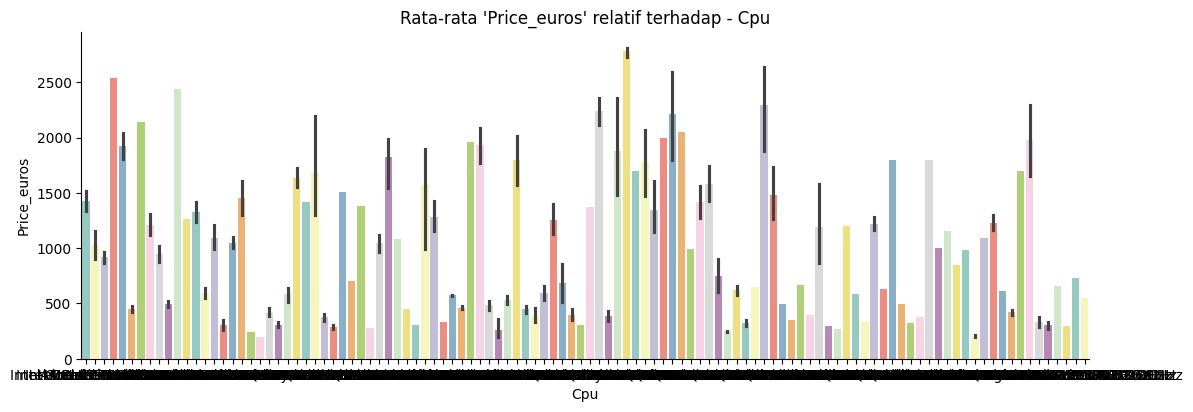

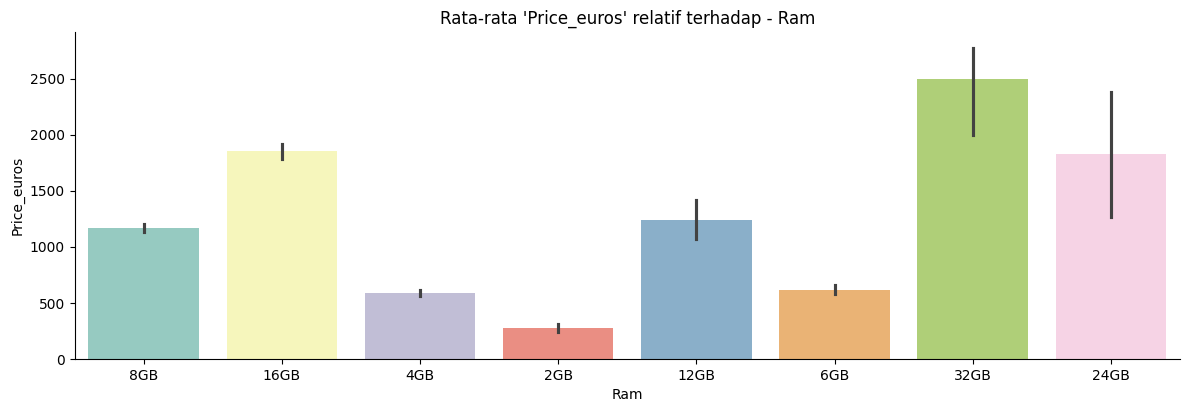

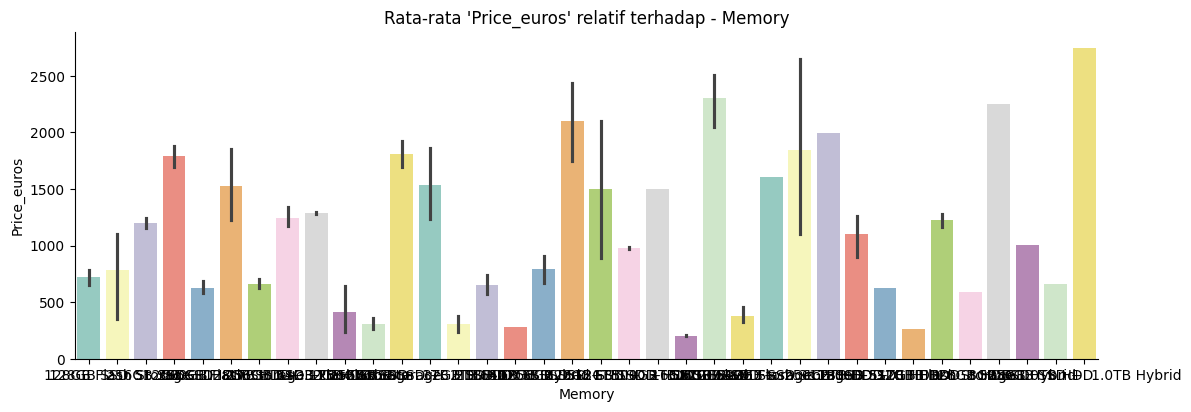

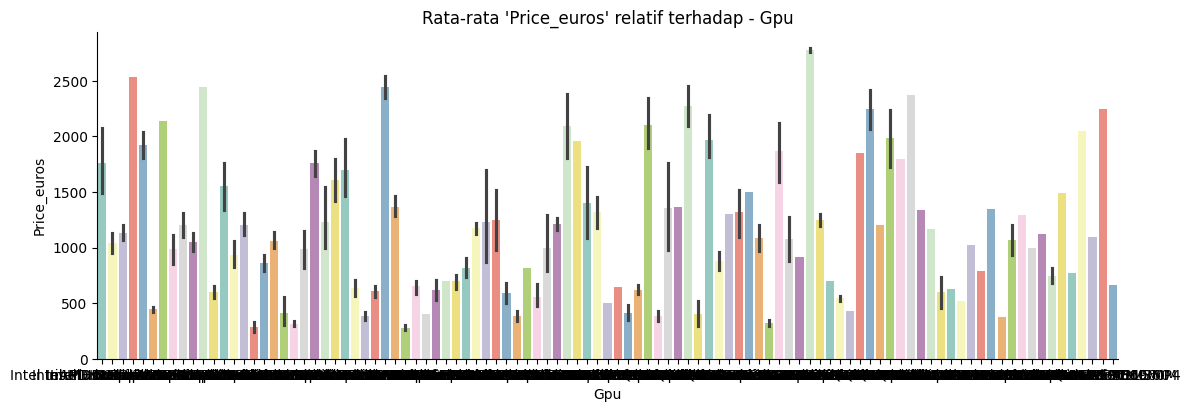

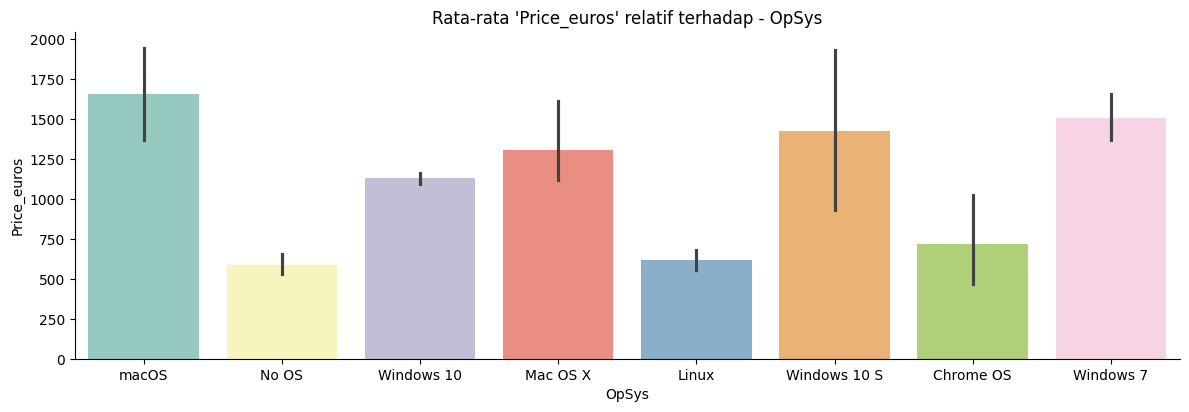

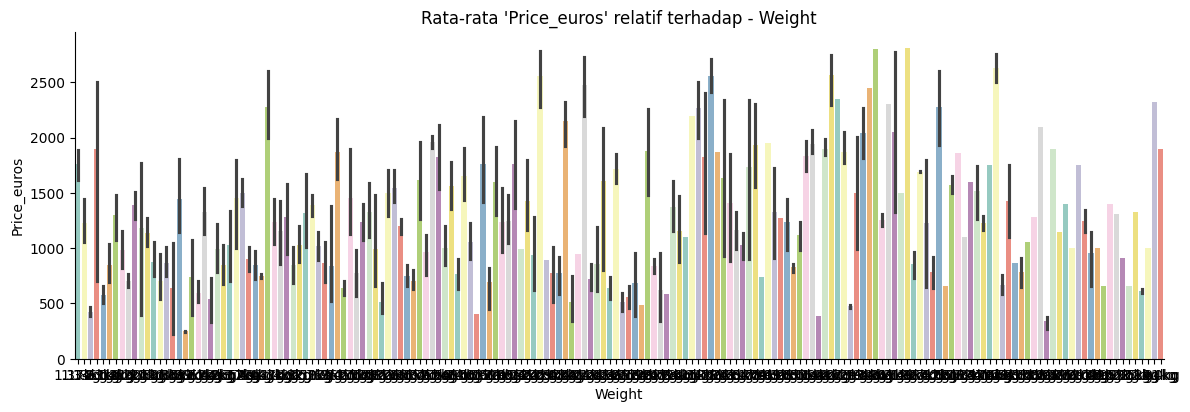

In [ ]:
cat_features = laptop.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='Price_euros', kind="bar", dodge=False, height = 4, aspect = 3,  data=laptop , palette="Set3")
  plt.title("Rata-rata 'Price_euros' relatif terhadap - {}".format(col))

Dengan mengamati rata-rata 'price_euros' relatif terhadap fitur kategori di atas, diperoleh *insight* sebagai berikut:

- Pada fitur 'Company', rata-rata 'price_euros' cenderung bervariasi. Rentangnya berada antara 1000 hingga 1500 euro.
- Nilai 'Price_euros' tertinggi berada pada nilai 'company' yaitu 'LG' dan nilai 'Price_euros' terendah berada pada nilai 'company' yaitu 'vero'. Sehingga, fitur 'company' memiliki pengaruh yang signifikan terhadap rata-rata 'Price_euros'.
- Kesimpulan akhir, fitur kategori memiliki pengaruh terhadap 'Price_euros'.

b. Data Numerik

Mengamati hubungan antar fitur numerik dengan fungsi pairplot()

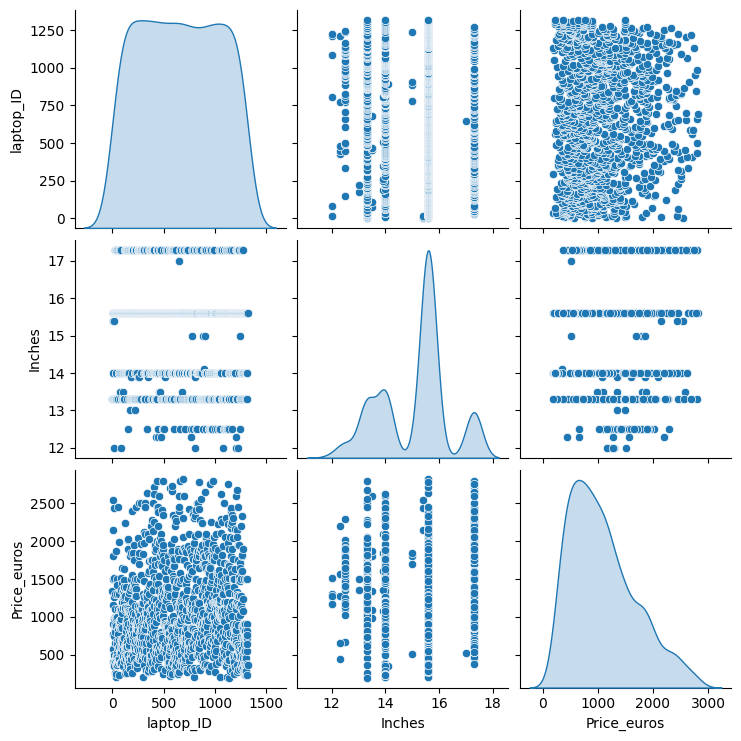

In [ ]:
sns.pairplot(laptop, diag_kind = 'kde')

Fungsi pairplot dari library seaborn menunjukkan relasi pasangan dalam dataset. Dari grafik, terlihat plot relasi masing-masing fitur numerik pada dataset. Pada pola sebaran data grafik pairplot sebelumnya, terlihat bahwa 'laptop_ID' memiliki korelasi dengan fitur 'Price_euros'. Sedangkan kedua fitur lainnya  terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola

Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah

Untuk mengevaluasi skor korelasinya, gunakan fungsi corr().

<ipython-input-178-abc9a02a512b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = laptop.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

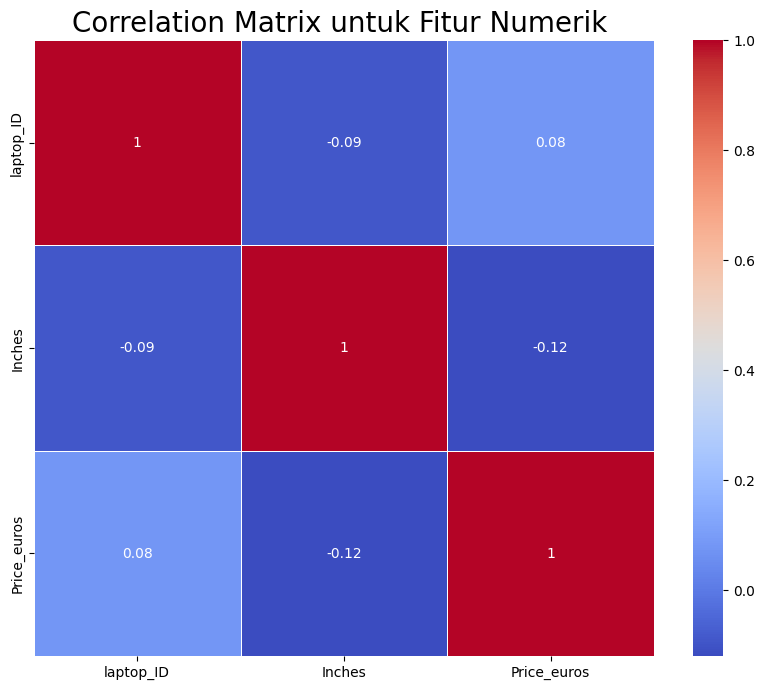

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = laptop.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Jika diamati, fitur 'price_euros' memiliki skor korelasi yang cukup besar (0.08) dengan fitur target 'laptop_ID'. Artinya, fitur 'Price_euros' berkorelasi cukup tinggi dengan keempat fitur tersebut. Sementara itu, fitur lainnya memiliki korelasi negatif sehingga, fitur tersebut dapat di-drop.

In [ ]:
laptop.drop(['TypeName', 'Inches', 'Weight', 'laptop_ID'], inplace=True, axis=1)
laptop.head()

<ipython-input-179-a26b07ef1091>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop.drop(['TypeName', 'Inches', 'Weight', 'laptop_ID'], inplace=True, axis=1)


,Company,Product,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,Apple,MacBook Pro,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69
1,Apple,Macbook Air,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94
2,HP,250 G6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,575.00
3,Apple,MacBook Pro,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,2537.45
4,Apple,MacBook Pro,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60


# **Data Preparation**

Data Peparation merupakan tahapan penting dalam proses pengembangan model machine learning. Pada tahap ini lakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahapan yang umum dilakukan pada data preparation, antara lain, seleksi fitur, transformasi data, feature engineering, dan dimensionality reduction.

Pada bagian ini lakukan empat tahap persiapan data, yaitu:
- Encoding fitur kategori.
- Reduksi dimensi dengan Principal Component Analysis (PCA).
- Pembagian dataset dengan fungsi train_test_split dari library sklearn.
- Standarisasi.

## Encoding

Untuk melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding.  Lakukan proses encoding ini dengan fitur get_dummies.

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
laptop = pd.concat([laptop, pd.get_dummies(laptop['Ram'], prefix='Ram')],axis=1)
laptop.drop(['Ram'], axis=1, inplace=True)
laptop.head()

,Company,Product,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price_euros,Ram_12GB,Ram_16GB,Ram_24GB,Ram_2GB,Ram_32GB,Ram_4GB,Ram_6GB,Ram_8GB
0,Apple,MacBook Pro,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,0,0,0,0,0,0,0,1
1,Apple,Macbook Air,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94,0,0,0,0,0,0,0,1
2,HP,250 G6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,0,0,0,0,0,0,0,1
3,Apple,MacBook Pro,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,0,1,0,0,0,0,0,0
4,Apple,MacBook Pro,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,0,0,0,0,0,0,0,1


##Reduksi Dimensi dengan PCA

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA. Ia adalah teknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n.

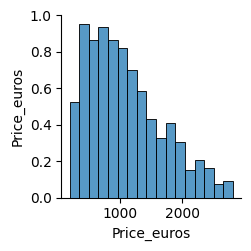

In [ ]:
sns.pairplot(laptop[['Price_euros','OpSys', 'Memory', 'Cpu']], plot_kws={"s": 4});